## Random Forest and Boosting
***

In [28]:
require(randomForest)
require(MASS)


In [29]:
set.seed(200)
train <- sample(1:nrow(Boston),300)

In [30]:
rf.boston <- randomForest(medv~.,data = Boston, subset = train)
rf.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 10.62039
                    % Var explained: 86.83

The only parameter for the random forest method function is mtry, which refers to the number of variables used at each split. We can select the parameter using cross validation

In [31]:
oob.err <- rep(NA,13)
test.err <- rep(NA,13)
for (nvar in 1:13){
    fit <- randomForest(medv~.,data = Boston, subset = train, mtry = nvar, ntree = 400)
    oob.err[nvar] <- fit$mse[length(fit$mse)]
    pred <- predict(fit,newdata = Boston[-train,])
    test.err[nvar] <- with(Boston[-train,],mean((medv-pred)^2)) 
}



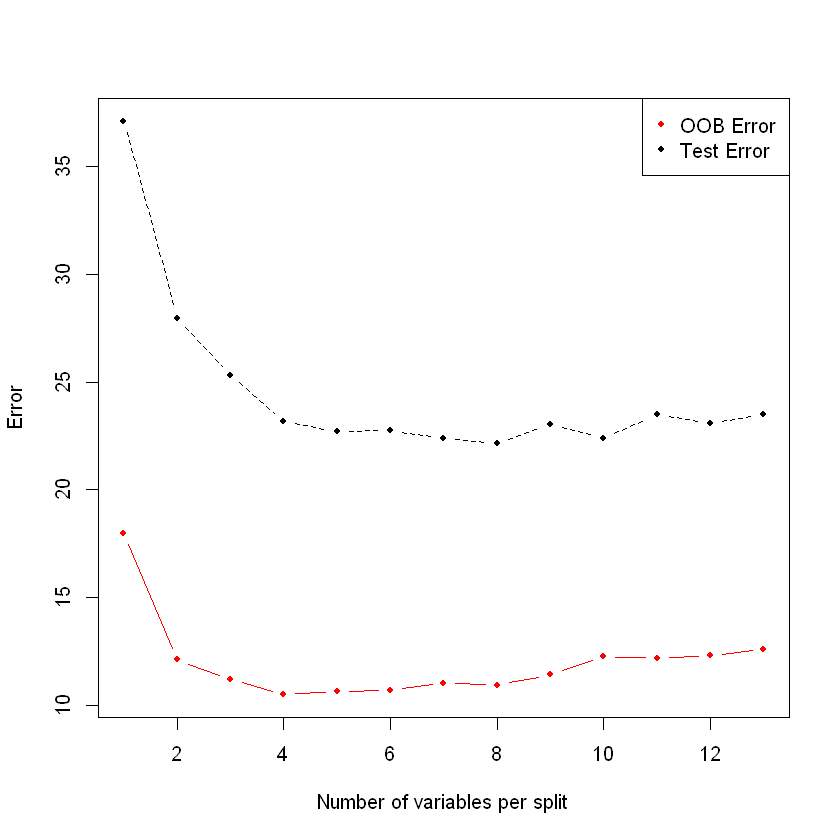

In [32]:
matplot(1:13, cbind(oob.err,test.err),col =c("red","black"), pch = 20, lwd = 0.5, type = "b",
       ylab = "Error",xlab = "Number of variables per split")
legend("topright", c("OOB Error","Test Error"), col =c("red","black"), pch = 20)

Bagging is a specific case of Random Forest with the maximum number of variables during the random forest process.

## Boosting
***

,var,rel.inf
rm,rm,42.61495242
lstat,lstat,26.97965028
crim,crim,5.85074944
ptratio,ptratio,5.14404374
dis,dis,4.89079212
black,black,3.30907020
age,age,3.16817136
nox,nox,3.09923658
tax,tax,2.05535768
indus,indus,1.90794164


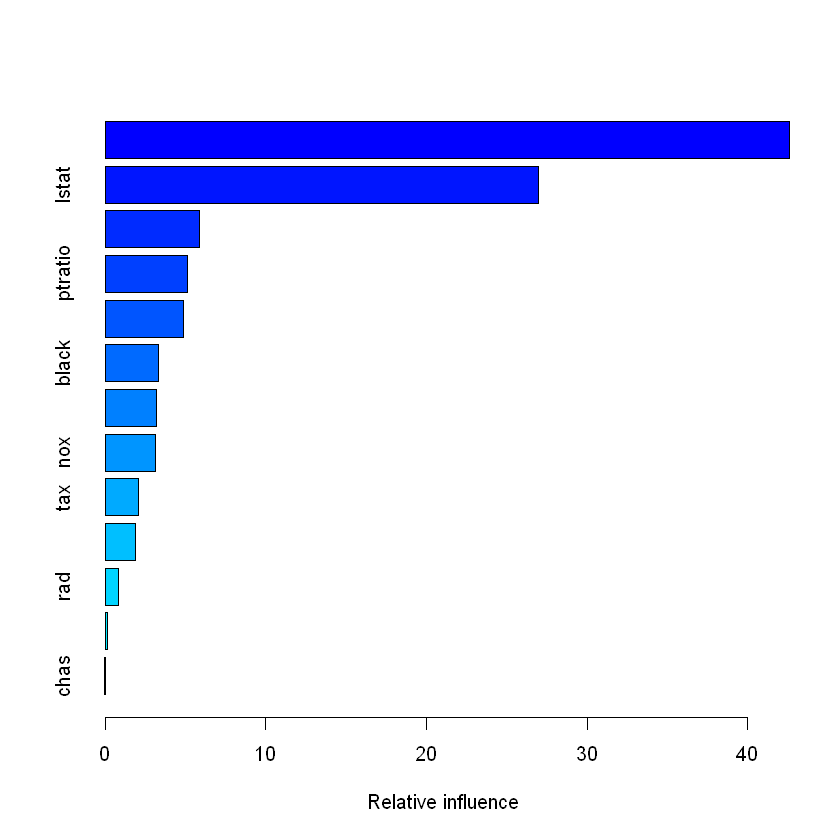

In [39]:
boost.Boston <- gbm(medv~.,data = Boston[train,], distribution = "gaussian", n.trees = 10000,
                   shrinkage = 0.01, interaction.depth = 4)
summary(boost.Boston)

Note 1: Most of the trees are quite shallow trees, this is given by the interaction.depth parameter. <br>
Note 2: Summary given a variable importance plot

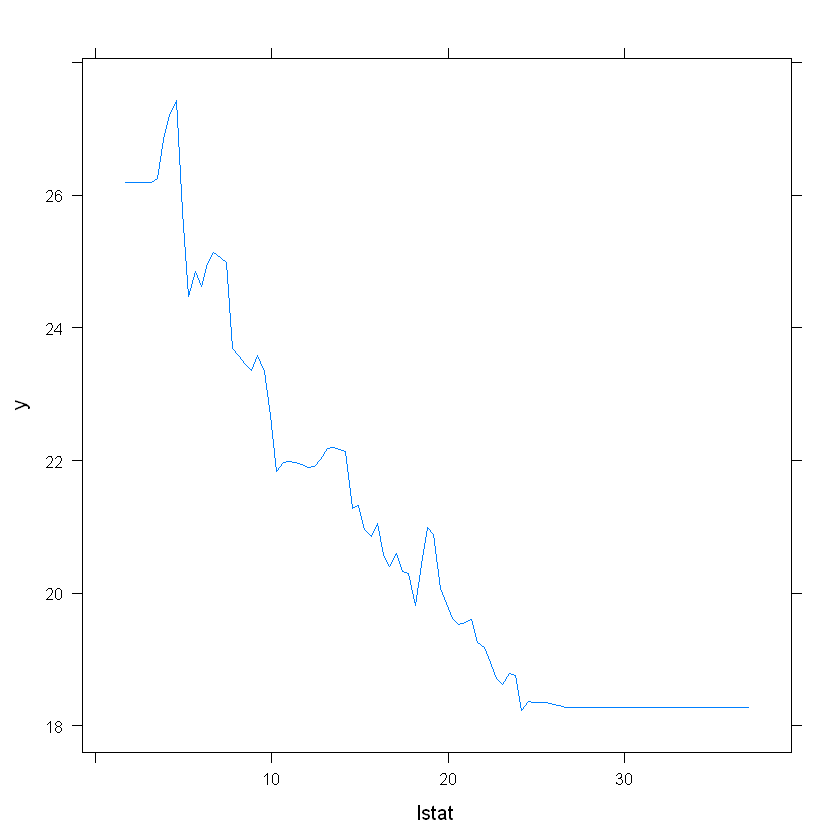

In [41]:
plot(boost.Boston,i = "lstat")

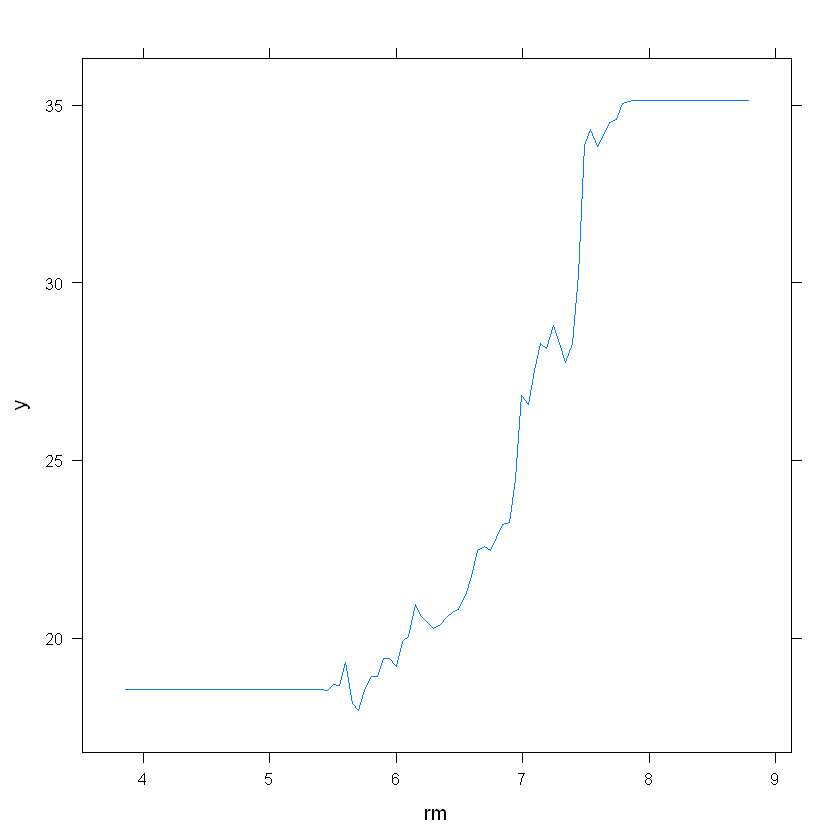

In [42]:
plot(boost.Boston,i = "rm")

In [45]:
n.trees <- seq(from = 100, to = 10000, by = 100)
predmat <- predict(boost.Boston, newdata = Boston[-train,], n.trees = n.trees)
b.err <- with(Boston[-train,], apply((predmat-medv)^2,2,mean)) #Trick to reuse the matrix with changing the syntax

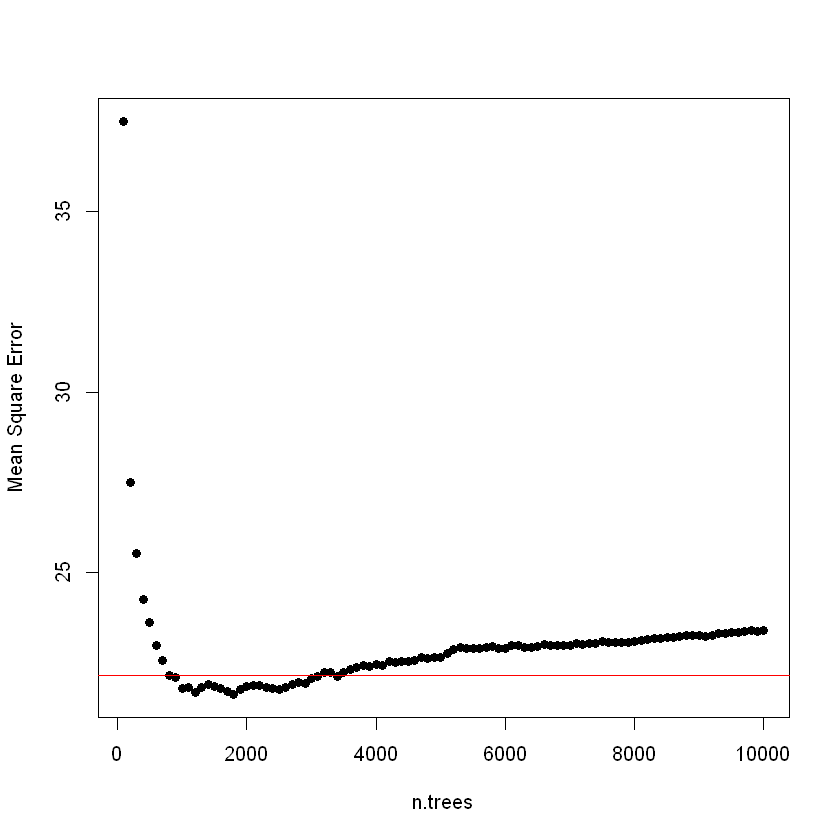

In [48]:
plot(n.trees,b.err,pch = 19,ylab = "Mean Square Error")
abline(h = min(test.err),col = "red")

Random forest is better that boosting for this case, however normally is quite the opposite. Boosting tends to outperform Random Forest. However the risk of overfitting with the boosting method is much higher